In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
SEED = 23

In [2]:
# df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/results/classification_dataset.csv')
# df = df.drop(['text', 'type', 'name', 'side_mistake',
#               'vs', 'squared_vs', 'ttr', 'root_ttr',
#               'log_ttr', 'uber_ttr', 'd', 'vvi',
#               'squared_vv', 'punct_mistakes_pp',
#               'punct_mistakes_because',
#               'punct_mistakes_but', 'punct_mistakes_compare'], axis=1)
# df['class'] = round(df['class'] / 10).astype(int)
# df.to_csv('/Users/ira/Downloads/REALEC_Inspector/results/mda_dataset.csv', index=False)

In [3]:
df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/results/mda_dataset.csv')
feature_columns = [feature for feature in df.columns if feature != 'class']
# df['class'] = df['class'].map({1: 'worst', 2: 'worst', 3: 'worst', 4: 'worst', 5: 'worst', 6: 'average', 7: 'best', 8: 'best'})
_X = df[feature_columns]
y = df['class']
num_feature = len(feature_columns)
df.head(3)

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,num_past_part,num_past_simple,num_linkings,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,million_mistake,class,sum_punct
0,3.56,6,2,2,0,1,18,244,4.39,13.56,...,2,0,5,1,0,0,2,0,6,0
1,5.43,10,4,1,3,1,7,175,6.29,25.00,...,1,4,6,1,0,0,3,0,6,0
2,3.81,6,0,5,0,13,16,292,4.56,18.25,...,2,9,13,5,2,1,1,0,6,1


In [4]:
X = StandardScaler().fit_transform(_X)

```cut-off: eigenvalues > 0.35```

In [5]:
covar_matrix = PCA(n_components=0.96, svd_solver='full', random_state=SEED)
covar_matrix.fit_transform(X)

array([[-4.84443315, -3.5400953 , -0.86202265, ..., -0.22537439,
         0.11286465, -0.34399855],
       [-2.91833967,  1.8779514 ,  0.94839615, ...,  0.04245561,
        -0.4616888 , -0.14237372],
       [ 3.09444201, -2.28129682,  0.77530876, ...,  1.30066505,
        -0.22219501,  0.91585132],
       ...,
       [-4.86226522, -3.60139628, -0.5297681 , ...,  0.11449111,
         0.32622439, -0.29401729],
       [-2.97109127,  0.55863078, -1.45753841, ..., -0.03610287,
         0.53495472,  0.6180673 ],
       [ 3.96163817,  2.63554069,  0.3765184 , ...,  0.18544797,
        -0.37319342,  1.90058387]])

In [6]:
percent_of_variance = np.round(covar_matrix.explained_variance_ratio_ * 100, 3)
cumulative_variance = np.cumsum(np.round(covar_matrix.explained_variance_ratio_ * 100, 3))
eigenvalues = np.round(covar_matrix.explained_variance_, 3)

In [7]:
pca_df = pd.DataFrame(data={'Factor number': range(1,len(eigenvalues)+1),
                            'Eigenvalue': eigenvalues,
                            'Percent of variance': percent_of_variance,
                            'Cumulative variance': cumulative_variance})

In [8]:
pca_df.head(10)

,Factor number,Eigenvalue,Percent of variance,Cumulative variance
0,1,14.151,23.978,23.978
1,2,6.796,11.515,35.493
2,3,3.496,5.923,41.416
3,4,2.886,4.889,46.305
4,5,2.618,4.436,50.741
5,6,2.047,3.469,54.210
6,7,1.906,3.230,57.440
7,8,1.474,2.497,59.937
8,9,1.317,2.232,62.169
9,10,1.271,2.154,64.323


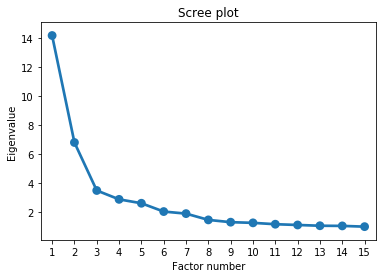

In [9]:
pca_df_15 = pca_df.iloc[:15]
graph = sns.pointplot(x='Factor number', y='Eigenvalue', data=pca_df_15, join=True).set_title('Scree plot')

```n_components = 4```

In [10]:
df_loadings = pd.DataFrame(covar_matrix.components_, columns=feature_columns)
df_loadings.index += 1 

In [11]:
df_loadings = df_loadings.round(3)

In [12]:
df_loadings.head(4)

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,num_pres_plur,num_past_part,num_past_simple,num_linkings,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,million_mistake,sum_punct
1,0.056,0.114,-0.064,0.115,0.160,0.208,0.181,0.241,-0.014,0.026,...,-0.006,0.061,0.055,0.202,0.143,0.134,0.176,-0.008,-0.045,0.097
2,0.309,0.191,0.198,0.097,0.022,0.054,-0.224,-0.013,0.166,0.365,...,-0.012,0.103,-0.012,-0.005,-0.031,-0.044,-0.067,0.018,0.038,0.017
3,0.069,0.028,0.073,0.055,-0.076,-0.015,-0.142,-0.181,-0.088,-0.036,...,-0.016,-0.016,-0.133,-0.017,-0.089,-0.064,0.020,-0.142,-0.069,-0.081
4,-0.020,-0.027,-0.037,-0.353,0.048,0.028,-0.067,-0.020,0.077,0.093,...,-0.030,-0.352,-0.060,-0.016,0.096,0.097,0.022,0.067,-0.050,0.104


In [13]:
components = {1: {'Feature': [], 'Loading': []},
              2: {'Feature': [], 'Loading': []},
              3: {'Feature': [], 'Loading': []},
              4: {'Feature': [], 'Loading': []}}
for feature in feature_columns:
    values = df_loadings[feature].to_list()
    abs_values = [abs(value) for value in values]
    index_max = np.argmax(abs_values) + 1
    value_max = values[index_max - 1]
    if index_max in components.keys():
        components[index_max]['Feature'].append(feature)
        components[index_max]['Loading'].append(value_max)

In [14]:
first_component = pd.DataFrame(data=components.get(1))
second_component = pd.DataFrame(data=components.get(2))
third_component = pd.DataFrame(data=components.get(3))
four_component = pd.DataFrame(data=components.get(4))

In [15]:
first_component

,Feature,Loading
0,num_tok,0.241
1,num_cl,0.236
2,num_compl_tu,0.216
3,ndw,0.249
4,corrected_ttr,0.220
5,corrected_vv,0.229
6,num_inf,0.231


In [16]:
second_component

,Feature,Loading
0,av_depth,0.309
1,num_sent,-0.224
2,av_len_sent,0.365
3,pos_sim_nei,0.349
4,pos_sim_all,0.348
5,lemma_sim_all,0.354
6,lemma_sim_nei,0.356


In [17]:
third_component

,Feature,Loading
0,density,0.255
1,lv,0.469
2,nv,0.352


In [18]:
four_component

,Feature,Loading
0,num_acl,-0.353
1,num_part_noun,-0.422
2,num_past_part,-0.352


# FactorAnalyzer

In [19]:
from factor_analyzer import FactorAnalyzer
X = StandardScaler().fit_transform(_X)

In [20]:
n_factors = 30
fa = FactorAnalyzer(rotation='promax', n_factors=n_factors)
fa.fit_transform(X)

array([[-0.72684772, -1.64830904, -1.30761303, ..., -0.22623249,
         0.31277652,  2.05900249],
       [-0.81440317,  0.62007953,  0.37508897, ..., -0.31175823,
        -0.25261159, -0.77553234],
       [ 0.65313296, -0.51695264, -0.29610072, ..., -0.91686254,
         0.00861953, -2.05424346],
       ...,
       [-0.82591947, -1.2187773 , -0.49745324, ...,  0.22977883,
        -1.10134669,  1.15264688],
       [-0.82424833, -0.11504184, -1.14304843, ..., -0.99451204,
        -0.34267701, -0.97319253],
       [ 1.20334035,  0.72613262,  0.35356488, ...,  0.04797357,
         0.70459145, -1.75795938]])

In [21]:
loadings = fa.loadings_
original_eigen_values, common_factor_eigen_values = fa.get_eigenvalues()
sum_of_squared_loadings, proportional_variance, cumulative_variance = fa.get_factor_variance()
eigen_values = np.round(original_eigen_values[:n_factors], 3)
cumulative_variance = np.round(cumulative_variance, 3)
proportional_variance = np.round(proportional_variance, 3)

In [22]:
fa_df = pd.DataFrame(data={'Factor number': range(1, n_factors + 1),
                           'Eigenvalue': eigen_values,
                           'Proportional variance': proportional_variance,
                           'Cumulative variance': cumulative_variance})

In [23]:
fa_df.head(10)

,Factor number,Eigenvalue,Proportional variance,Cumulative variance
0,1,14.147,0.183,0.183
1,2,6.794,0.090,0.273
2,3,3.495,0.038,0.311
3,4,2.885,0.036,0.347
4,5,2.617,0.034,0.381
5,6,2.047,0.033,0.415
6,7,1.906,0.029,0.444
7,8,1.473,0.027,0.472
8,9,1.317,0.027,0.499
9,10,1.271,0.025,0.524


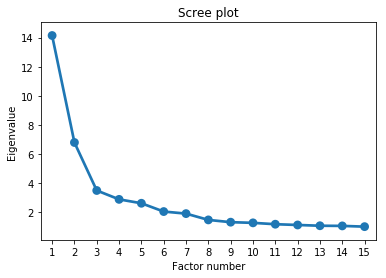

In [24]:
fa_df_15 = fa_df.iloc[:15]
graph = sns.pointplot(x='Factor number', y='Eigenvalue', data=fa_df_15, join=True).set_title('Scree plot')

In [25]:
df_loadings = pd.DataFrame(loadings.T, columns=feature_columns)
df_loadings.index += 1 

In [26]:
df_loadings.head()

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,num_pres_plur,num_past_part,num_past_simple,num_linkings,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,million_mistake,sum_punct
1,0.002802,0.016986,-0.119573,0.140021,0.263775,0.801144,0.815167,1.004614,0.033566,0.023921,...,0.014805,0.035042,0.284098,0.731098,0.075289,0.065572,0.610179,0.093414,-0.182191,0.359487
2,0.264616,0.249590,0.006811,-0.024735,0.011621,-0.037734,-0.363749,0.013266,0.233201,0.819172,...,0.017730,0.010950,0.005589,0.007229,-0.005030,0.006630,-0.038360,-0.024732,0.002854,0.164435
3,0.027608,0.045719,-0.000969,-0.013683,0.010797,-0.028792,-0.074555,-0.062977,-0.005421,-0.002576,...,-0.014436,-0.036821,-0.083780,-0.053623,-0.041479,0.018211,0.121028,0.001347,0.073847,0.051145
4,-0.015560,-0.068851,0.036049,-0.004803,0.011812,-0.043713,-0.058822,-0.109865,-0.043590,-0.019201,...,-0.014979,0.002280,-0.077444,0.003646,0.003396,-0.004490,0.093194,-0.012293,0.017411,-0.039200
5,0.006302,0.002757,0.004667,0.046455,-0.019757,-0.034124,-0.035711,-0.009716,-0.047443,-0.009131,...,0.004354,-0.055561,0.061553,-0.061544,-0.000513,0.011693,0.005923,0.002335,-0.060195,0.011193


In [27]:
components = {1: {'Feature': [], 'Loading': []},
              2: {'Feature': [], 'Loading': []},
              3: {'Feature': [], 'Loading': []},
              4: {'Feature': [], 'Loading': []}}
for feature in feature_columns:
    values = df_loadings[feature].to_list()
    abs_values = [abs(value) for value in values]
    index_max = np.argmax(abs_values) + 1
    value_max = values[index_max - 1]
    if index_max in components.keys():
        components[index_max]['Feature'].append(feature)
        components[index_max]['Loading'].append(value_max)

In [28]:
first_component = pd.DataFrame(data=components.get(1))
second_component = pd.DataFrame(data=components.get(2))
third_component = pd.DataFrame(data=components.get(3))
four_component = pd.DataFrame(data=components.get(4))

In [29]:
first_component

,Feature,Loading
0,num_advcl,0.801144
1,num_sent,0.815167
2,num_tok,1.004614
3,num_cl,0.899994
4,num_tu,0.806805
5,num_compl_tu,0.704202
6,num_coord,0.764878
7,num_adj_noun,0.671781
8,ndw,1.008609
9,corrected_ttr,0.826942


In [30]:
second_component

,Feature,Loading
0,av_len_sent,0.819172
1,pos_sim_nei,1.050265
2,pos_sim_all,1.052638
3,lemma_sim_all,1.012116
4,lemma_sim_nei,1.017888


In [31]:
third_component

,Feature,Loading
0,lfp_1000,1.023670
1,lfp_rest,-0.880627


In [32]:
four_component

,Feature,Loading
0,lv,0.904525
1,nv,0.935005


# Factor scores

In [33]:
def count_factor_score_for_each_essay(df, features):
    essay_factors = []
    for index, essay_row in df.iterrows():
        all_feature_one_essay_factor_score = []
        for f in features:
            M = np.mean(df[f], axis=0)
            SD = np.std(df[f], axis=0)
            essay_value = essay_row[f]
            one_feature_one_essay_factor_score = (essay_value - M) / SD
            all_feature_one_essay_factor_score.append(one_feature_one_essay_factor_score)
        factor_essay_score = np.mean(all_feature_one_essay_factor_score)
        essay_factors.append(round(factor_essay_score, 3))
    return essay_factors

In [34]:
first_essay_factors = count_factor_score_for_each_essay(df, first_component.Feature)
first_df = pd.DataFrame(data={'grade': y, 'factor score': first_essay_factors})
first_df = first_df.groupby('grade').mean()
first_df = pd.DataFrame(data={'grade': first_df.index, 'factor score': first_df['factor score'], 'x': [1] * 8})
first_df

,grade,factor score,x
grade,,,
1,1,-1.473000,1
2,2,-1.033958,1
3,3,-0.849143,1
4,4,-0.629361,1
5,5,-0.296316,1
6,6,0.025140,1
7,7,0.305325,1
8,8,0.224338,1


Text(0.5, 1.0, '1 factor')

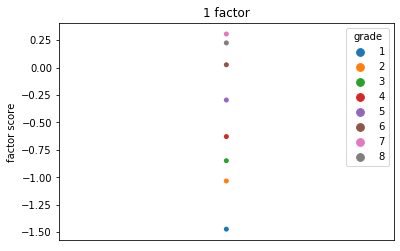

In [35]:
g=sns.stripplot(x="x", y="factor score", hue="grade", data=first_df, jitter=False)
g.xaxis.set_visible(False) 
g.set_title("1 factor")

In [36]:
second_essay_factors = count_factor_score_for_each_essay(df, second_component.Feature)
second_df = pd.DataFrame(data={'grade': y, 'factor score': second_essay_factors})
second_df = second_df.groupby('grade').mean()
second_df = pd.DataFrame(data={'grade': second_df.index, 'factor score': second_df['factor score'], 'x': [2] * 8})
second_df

,grade,factor score,x
grade,,,
1,1,0.457000,2
2,2,-0.802208,2
3,3,-0.635643,2
4,4,-0.501648,2
5,5,-0.307628,2
6,6,0.001290,2
7,7,0.408260,2
8,8,0.335571,2


Text(0.5, 1.0, '2 factor')

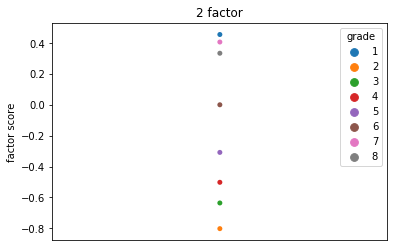

In [37]:
g=sns.stripplot(x="x", y="factor score", hue="grade", data=second_df, jitter=False)
g.xaxis.set_visible(False) 
g.set_title("2 factor")

In [38]:
third_essay_factors = count_factor_score_for_each_essay(df, third_component.Feature)
third_df = pd.DataFrame(data={'grade': y, 'factor score': third_essay_factors})
third_df = third_df.groupby('grade').mean()
third_df = pd.DataFrame(data={'grade': third_df.index, 'factor score': third_df['factor score'], 'x': [3] * 8})
third_df

,grade,factor score,x
grade,,,
1,1,-0.164000,3
2,2,0.046000,3
3,3,0.026071,3
4,4,-0.041115,3
5,5,0.005823,3
6,6,0.009445,3
7,7,-0.069536,3
8,8,-0.018662,3


Text(0.5, 1.0, '3 factor')

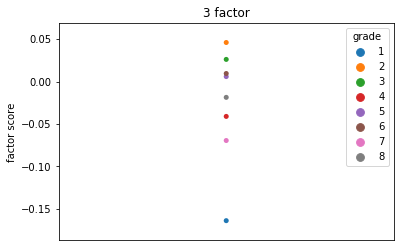

In [39]:
g=sns.stripplot(x="x", y="factor score", hue="grade", data=third_df, jitter=False)
g.xaxis.set_visible(False) 
g.set_title("3 factor")

In [40]:
four_essay_factors = count_factor_score_for_each_essay(df, four_component.Feature)
four_df = pd.DataFrame(data={'grade': y, 'factor score': four_essay_factors})
four_df = four_df.groupby('grade').mean()
four_df = pd.DataFrame(data={'grade': four_df.index, 'factor score': four_df['factor score'], 'x': [4] * 8})
four_df

,grade,factor score,x
grade,,,
1,1,4.750000,4
2,2,1.543292,4
3,3,1.849714,4
4,4,0.896369,4
5,5,0.105614,4
6,6,-0.072813,4
7,7,0.002224,4
8,8,-0.069325,4


Text(0.5, 1.0, '4 factor')

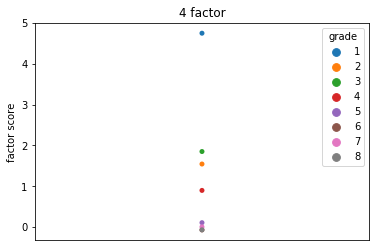

In [41]:
g=sns.stripplot(x="x", y="factor score", hue="grade", data=four_df, jitter=False)
g.xaxis.set_visible(False) 
g.set_title("4 factor")

# ANOVA

In [42]:
import pingouin as pg

In [43]:
def get_info(feature, df):
    one_way_anova = pg.anova(data=df, dv=feature, between='class', detailed=True)
    p_value = one_way_anova['p-unc'][0]
    F = one_way_anova['F'][0]
    np2 = one_way_anova['np2'][0]
    return round(p_value, 3), round(F, 3), round(np2, 3)

In [44]:
p_values = []
Fs = []
np2s = []
for f in first_component.Feature:
    p_value, F, np2 = get_info(f, df)
    p_values.append(p_value)
    Fs.append(F)
    np2s.append(np2)
f_df_anova = pd.DataFrame(data={'F-value': Fs, 'p-value': p_values, 'partial eta-square': np2s, 'feature': first_component.Feature})
f_df_anova = f_df_anova.sort_values(['F-value', 'partial eta-square'], ascending=[0, 0])
f_df_anova.set_index('feature')

,F-value,p-value,partial eta-square
feature,,,
num_tok,75.473,0.000,0.133
ndw,60.415,0.000,0.110
corrected_ttr,32.925,0.000,0.063
num_linkings,31.346,0.000,0.060
num_adj_noun,30.852,0.000,0.059
num_advcl,29.219,0.000,0.056
corrected_vv,28.964,0.000,0.056
num_cl,28.816,0.000,0.055
num_compl_tu,23.323,0.000,0.045


In [45]:
p_values = []
Fs = []
np2s = []
for f in second_component.Feature:
    p_value, F, np2 = get_info(f, df)
    p_values.append(p_value)
    Fs.append(F)
    np2s.append(np2)
f_df_anova = pd.DataFrame(data={'F-value': Fs, 'p-value': p_values, 'partial eta-square': np2s, 'feature': second_component.Feature})
f_df_anova = f_df_anova.sort_values(['F-value', 'partial eta-square'], ascending=[0, 0])
f_df_anova.set_index('feature')

,F-value,p-value,partial eta-square
feature,,,
av_len_sent,22.314,0.0,0.044
lemma_sim_all,21.241,0.0,0.042
lemma_sim_nei,20.944,0.0,0.041
pos_sim_all,17.175,0.0,0.034
pos_sim_nei,17.090,0.0,0.034


In [46]:
p_values = []
Fs = []
np2s = []
for f in third_component.Feature:
    p_value, F, np2 = get_info(f, df)
    p_values.append(p_value)
    Fs.append(F)
    np2s.append(np2)
f_df_anova = pd.DataFrame(data={'F-value': Fs, 'p-value': p_values, 'partial eta-square': np2s, 'feature': third_component.Feature})
f_df_anova = f_df_anova.sort_values(['F-value', 'partial eta-square'], ascending=[0, 0])
f_df_anova.set_index('feature')

,F-value,p-value,partial eta-square
feature,,,
lfp_rest,8.783,0.0,0.018
lfp_1000,6.157,0.0,0.012


In [47]:
p_values = []
Fs = []
np2s = []
for f in four_component.Feature:
    p_value, F, np2 = get_info(f, df)
    p_values.append(p_value)
    Fs.append(F)
    np2s.append(np2)
f_df_anova = pd.DataFrame(data={'F-value': Fs, 'p-value': p_values, 'partial eta-square': np2s, 'feature': four_component.Feature})
f_df_anova = f_df_anova.sort_values(['F-value', 'partial eta-square'], ascending=[0, 0])
f_df_anova.set_index('feature')

,F-value,p-value,partial eta-square
feature,,,
lv,71.511,0.0,0.127
nv,15.827,0.0,0.031


# Predictions

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [49]:
base_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=5, 
    n_jobs=-1,
    oob_score=True,
    class_weight='balanced',
    random_state=SEED)

rfc = RandomForestClassifier(class_weight='balanced', random_state=SEED)
knc = KNeighborsClassifier()
lr = LogisticRegression(class_weight='balanced', random_state=SEED)

In [62]:
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    return np.array(imp)

def plot_dropping_feature_importance(X, y, base_rf):
    rf = clone(base_rf)
    rf.fit(X, y)
    importances = dropcol_importances(rf, X, y)
    indices = np.argsort(importances)[::-1]
    features = [X.columns[i] for i in indices]
    fi_df = pd.DataFrame(data={'importance': importances[indices], 'feature': features})
    return fi_df

def plot_importance(df_importance):
    plt.figure(figsize=(15,8))
    sns_plt = sns.barplot(x="feature", y="importance", data=df_importance, palette="Set2")
    loc, labels = plt.xticks()
    sns_plt.set_xticklabels(labels, rotation=90)
    return sns_plt

def build_model(classifier, features):
    get_numeric_data = FunctionTransformer(lambda x: x[features], validate=False)
    model = Pipeline([
        ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data)
            ]))
        ])),
        ('clf', classifier)
    ])
    return model

def get_info(classifier, X, y, classes, plot_matrix=False):
    model = build_model(classifier=classifier, features=X.columns)
    y_pred = cross_val_predict(model, X, y, cv=10)
    print(classification_report(y, y_pred))
    if plot_matrix:
        conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
        sns_plt = sns.heatmap(conf_mat, annot=True, fmt="d",
                              yticklabels=classes,
                              xticklabels=classes)

## Feature importnaces

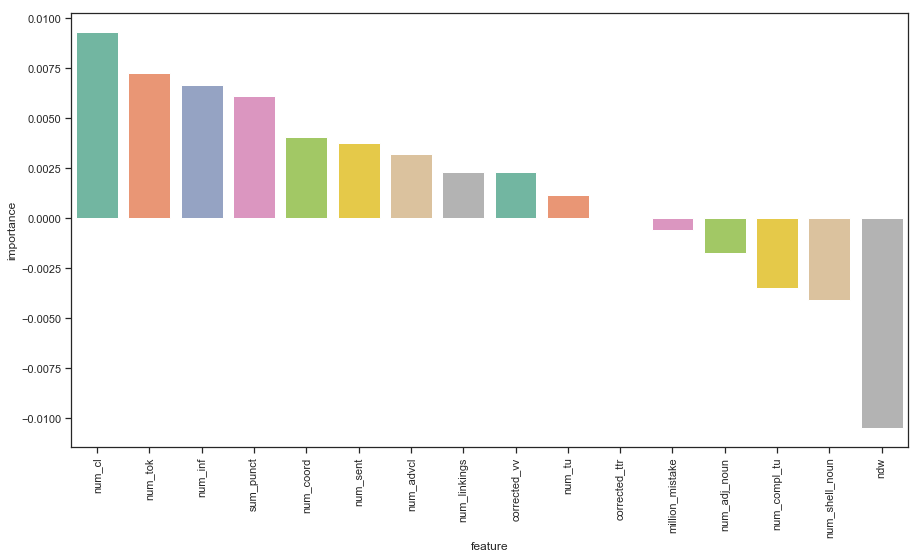

In [63]:
f_df = plot_dropping_feature_importance(df[first_component.Feature], y, base_rf)
sns_plt = plot_importance(f_df)

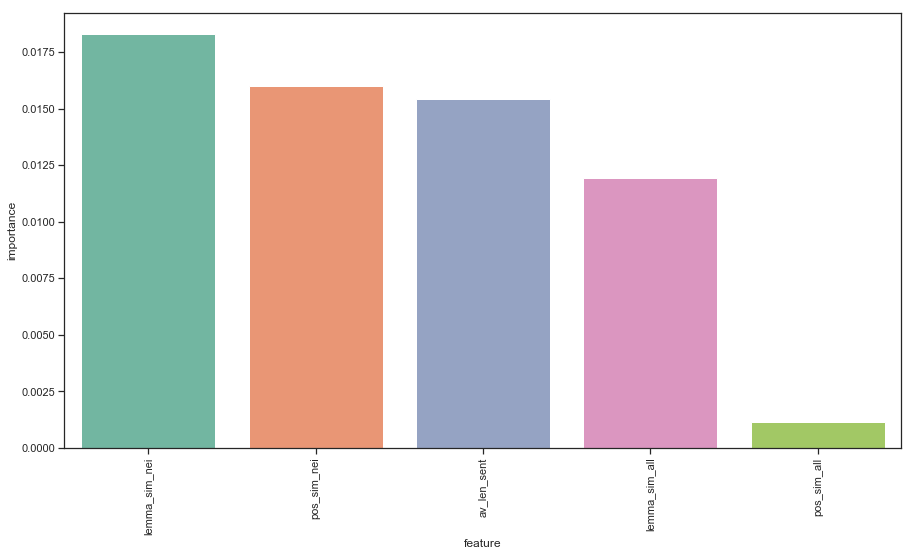

In [67]:
f_df = plot_dropping_feature_importance(df[second_component.Feature], y, base_rf)
sns_plt = plot_importance(f_df)

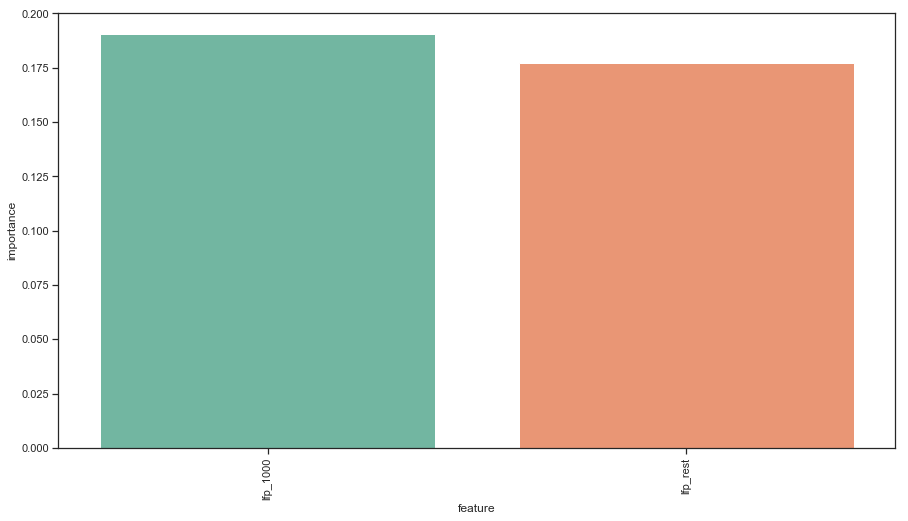

In [68]:
f_df = plot_dropping_feature_importance(df[third_component.Feature], y, base_rf)
sns_plt = plot_importance(f_df)

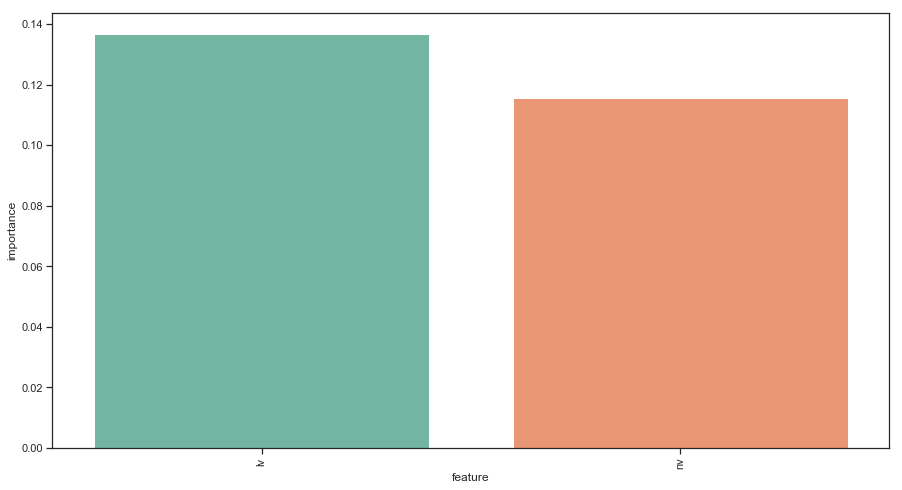

In [69]:
f_df = plot_dropping_feature_importance(df[four_component.Feature], y, base_rf)
sns_plt = plot_importance(f_df)

In [66]:
for i, factor in enumerate([first_component.Feature,
                            second_component.Feature,
                            third_component.Feature,
                            four_component.Feature],
                           start=1):
    print(f'# {i} factor')
    f_df = plot_dropping_feature_importance(df[factor], y, base_rf)
    features = factor
    best_features = f_df[f_df.importance > 0]['feature'].to_list()
    print('Best_features:', best_features)
    print('===== With all features =====')
    for classificator in [lr, rfc, knc]:
        print(f'{classificator}')
        get_info(classificator, df[features], y, classes=set(df['class']))
    print('===== With best features =====')
    for classificator in [lr, rfc, knc]:
        print(f'{classificator}')
        get_info(classificator, df[best_features], y, classes=set(df['class']))

# 1 factor
Best_features: ['num_cl', 'num_tok', 'num_inf', 'sum_punct', 'num_coord', 'num_sent', 'num_advcl', 'num_linkings', 'corrected_vv', 'num_tu']
===== With all features =====
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=23,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.08      0.25      0.12        24
           3       0.07      0.50      0.12        14
           4       0.25      0.22      0.23       122
           5       0.26      0.05      0.08       215
           6       0.82      0.88      0.85      2680
           7       0.23      0.07      0.11       308
           8       0.07      0.13      0.09        77

   micro avg       0.71      0.71      0.71      3441
   macro

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.07      0.17      0.10        24
           3       0.07      0.14      0.09        14
           4       1.00      0.01      0.02       122
           5       0.00      0.00      0.00       215
           6       0.78      0.96      0.86      2680
           7       0.13      0.01      0.02       308
           8       0.00      0.00      0.00        77

   micro avg       0.75      0.75      0.75      3441
   macro avg       0.26      0.16      0.14      3441
weighted avg       0.66      0.75      0.67      3441

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_job

Best_features: ['lv', 'nv']
===== With all features =====
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=23,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        24
           3       0.10      0.50      0.16        14
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00       215
           6       0.79      0.99      0.88      2680
           7       0.00      0.00      0.00       308
           8       0.00      0.00      0.00        77

   micro avg       0.78      0.78      0.78      3441
   macro avg       0.11      0.19      0.13      3441
weighted avg       0.62      0.78      0.69      3441

RandomForestClassifier(